# Task 1 : Prediction using Supervised Machine Learning

## • Importing libraries and data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics  
from sklearn.model_selection import train_test_split 

In [2]:
#Importing data from the given URL 
url = r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print(data.head())
data['Scores'].max()

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


95

## • Visualizing the data

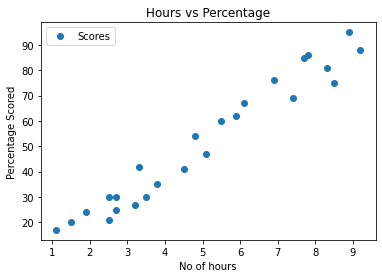

In [3]:
# Scatter plot of Hours vs percentage score
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('No of hours')  
plt.ylabel('Percentage Scored')  
plt.show()

In [4]:
#X is the input, y signifies the output ( 2nd column )
X = data.iloc[:, :-1].values 
y = data.iloc[:, 1].values

## • Training of model and making predictions

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
regressor = LinearRegression()  
regressor.fit(X_train.reshape(-1,1), y_train) 

print("Training completed successfully")

Training completed successfully


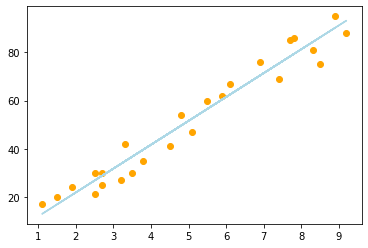

In [6]:
# Plotting for the line along with test data to see how well it fits the data 
plt.scatter(X, y, color='orange')
line = regressor.coef_*X+regressor.intercept_
plt.plot(X, line,color='lightblue');
plt.show()

In [7]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [8]:
print(y_pred)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


## • Comparison of Actual and Predicted values 


In [9]:
# Comparing actual values to the predicted ones
data2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
data2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [10]:
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105354


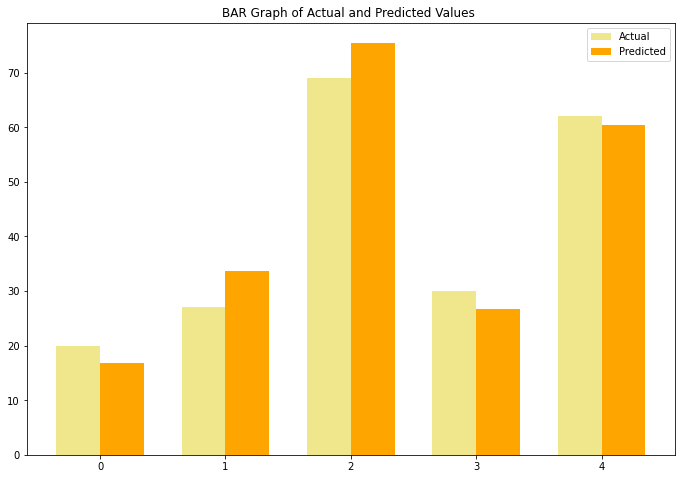

In [11]:
ind = np.arange(len(data2['Actual']))  
width = 0.35  
fig, ax = plt.subplots()
ax = fig.add_axes([0,0,1.5,1.5])
rects1 = ax.bar(ind - width/2, data2['Actual'], width,
                label='Actual', color='khaki')
rects2 = ax.bar(ind + width/2, data2['Predicted'], width,
                label='Predicted',color='orange')

ax.set_title('BAR Graph of Actual and Predicted Values ')
ax.legend()
plt.show()



In [16]:
#Testing against data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
pred = regressor.predict(test)


No of Hours = 9.25
Predicted Score = 93.69173248737539


What will be predicted score if a student study for 9.25 hrs in a day?



In [20]:
print("No of Hours = {}".format(hours))
print("Predicted Score comes out to be = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score comes out to be = 93.69173248737539


## • Evaluation of Model

In [17]:
print('Mean Absolute Error(MAE):',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error(MSE) :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-Squared(R^2):', metrics.r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 4.183859899002982
Mean Squared Error(MSE) : 21.598769307217456
Root Mean Squared Error(RMSE): 4.647447612100373
R-Squared(R^2): 0.9454906892105354
